# Risk Measures and Portfolio Optimization

**Prepared by:** Madelynn Watson (mwatson4@nd.edu, 2023)

## Introduction

In engineering, a common objective for optimization problems is maximizing overall profit; however, typically, static market prices are considered for different commodities which do not reflect actual market behavior. Failing to account for this uncertainty can lead to risk-inclined investments. Markowitz initially developed portfolio optimization in 1959 to de-risk financial asset portfolio returns in volatile market situations. In this framework proposed by Markowitz, a multi-objective optimization problem is considered where the expected value of the portfolio return is maximized, and the financial risk is minimized by selecting "weights" or quantities of each asset [1]. One challenge in this framework is how to quantify the financial risk. Throughout this notebook, we will examine five different risk measures (mean-variance (MV), mean-absolute deviation (MAD), Minmax (MM), value-at-risk (VaR), and conditional value-at-risk (CVaR)) and demonstrate their use in a motivating example for product portfolio optimization.


## Common Risk Measures for Portfolio Optimization

### Mean-Variance (MV) [1,2]

MV was the original quantifier of risk used by Markowitz in 1959. Here the risk is defined as the variance for a given expected return. The mathematical model is detailed in the following equations where $x_i$ and $x_j$ represent the quantity of assets i and j, and $\sigma_{i,j}$ represents the covariance of asset i and j.

\begin{align*}
MV = \sum_{i=1}^{n} \sum_{j=1}^{n} \sigma_{i,j} x_i x_j 
\end{align*}

Although MV is easy to implement for simple portfolio problems, the computation of the covariance matrix makes it challenging to implement on large-scale problems. Additionally, if data is not normally distributed (a common challenge with real data) and there lies asymmetry in the probability distribution leading to a need for different risk measures to better quantify the risk-return tradeoffs.

#### Literature Examples Using MV

<div class="csl-entry">Xu, D., Bai, Z., Jin, X., Yang, X., Chen, S., &#38; Zhou, M. (2022). A mean-variance portfolio optimization approach for high-renewable energy hub. <i>Applied Energy</i>, <i>325</i>. https://doi.org/10.1016/j.apenergy.2022.119888</div>


<div class="csl-entry">Chen, W., Zhang, H., Mehlawat, M. K., &#38; Jia, L. (2021). Mean–variance portfolio optimization using machine learning-based stock price prediction. <i>Applied Soft Computing</i>, <i>100</i>. https://doi.org/10.1016/j.asoc.2020.106943</div>

### Mean-Absolute Deviation (MAD) [1,3]

MAD was proposed by Konno and Yamazaki in 1991. The MAD model is a variant of the MV model in which the measure of risk is replaced by the absolute deviation. The mathematical model is detailed in the following equations where $x_j$ represents the quantity of asset j and $R_j$ represents the return of asset j.

\begin{align*}
MAD = E \left[ \mid \sum_{j=1}^{n} R_j x_j -E \left[ \sum_{j=1}^{n} R_j x_j \right] \mid \right]
\end{align*}

MAD can be employed for large-scale and highly diversified portfolio selection problems. One drawback of this risk measure is that it penalizes both positive and negative deviations. 

#### Graphical Representation [3]

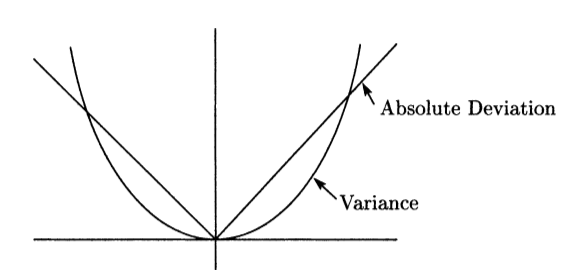

#### Literature Examples Using MAD

<div class="csl-entry">Hosseini-Nodeh, Z., Khanjani-Shiraz, R., &#38; Pardalos, P. M. (2023). Portfolio optimization using robust mean absolute deviation model: Wasserstein metric approach. <i>Finance Research Letters</i>. https://doi.org/10.1016/j.frl.2023.103735</div>

<div class="csl-entry">Ferreira, L., Borenstein, D., Righi, M. B., &#38; de Almeida Filho, A. T. (2018). A fuzzy hybrid integrated framework for portfolio optimization in private banking. <i>Expert Systems with Applications</i>, <i>92</i>, 350–362. https://doi.org/10.1016/j.eswa.2017.09.055</div>

### Minimax (MM) [1]

MM uses the minimum return as a measure of risk. In scenarios where the asset returns are multivariate and normally distributed, both MM and MV lead to the same result. This risk measure is simply shown below, where $M_p$ represents the minimum portfolio return.

\begin{align*}
MM = M_p 
\end{align*}

MM has certain advantages when the returns are not normally distributed. Additionally, MM is fast due to its property of linear 
programming and can be employed for more complex models and constraints. One of the 
disadvantages of MM is its sensitivity to outliers. Hence, it cannot be used when the historical data is missing.

#### Literature Examples Using MM

<div class="csl-entry">Li, B., Sun, Y., Aw, G., &#38; Teo, K. L. (2019). Uncertain portfolio optimization problem under a minimax risk measure. <i>Applied Mathematical Modelling</i>, <i>76</i>, 274–281. https://doi.org/10.1016/j.apm.2019.06.019</div>

<div class="csl-entry">Polak, G. G., Rogers, D. F., &#38; Sweeney, D. J. (2010). Risk management strategies via minimax portfolio optimization. <i>European Journal of Operational Research</i>, <i>207</i>(1), 409–419. https://doi.org/10.1016/j.ejor.2010.04.025</div>

### Value-at-Risk (VaR) [1,4]

VaR is a measure of how the market value of an asset is likely to reduce over a period of time under certain market 
conditions. VaR requires the determination of three parameters (i) time horizon, (ii) confidence level
time horizon, and (iii) unit of VaR. The VaR at a given confidence level β corresponds to the 1−β percentile of the profit distribution, namely the lowest yearly profit after excluding all worse profits whose joint probability is at most 1−β. The formulation from Mutran et al. (2020) is shown below. Here the maximum V represents VaR, $R_j$ is the return of asset j, and 1[·] stands for the Heavside step function, such that 1[x] = 1 for x $\geq$ 0 and 1[x]=0 otherwise.

\begin{align*}
VaR_{\beta} = \max V \\
s.t.  \sum_{j=1}^{N} 1 \left[ V - R_j \right] \leq (1-\beta)N
\end{align*}

VaR can be misleading as it does not consider the worst-case loss. Additionally, VaR Jorion is discrete in nature and difficult to implement mathematically.

#### Literature Examples Using VaR

<div class="csl-entry">al Janabi, M. A. M., Ferrer, R., &#38; Shahzad, S. J. H. (2019). Liquidity-adjusted value-at-risk optimization of a multi-asset portfolio using a vine copula approach. <i>Physica A: Statistical Mechanics and Its Applications</i>, <i>536</i>. https://doi.org/10.1016/j.physa.2019.122579</div>

### Conditional Value-at-Risk (CVaR) [1,4]

CVaR is a scenario-based approach where the condition associated with VaR is the weighted average of VaR and losses exceeding VaR. This quantity represents the expected value of the 100(1-β) % worst scenarios at a given confidence level β. CVaR is an alternative to VaR that is more sensitive to the shape of the tail of the scenario distribution. Additionally, CVaR is a coherent and convex measure of risk. 

\begin{align*}
CVaR_{\beta} = VaR_{\beta} - \frac{1}{(1-\beta)N}  \sum_{j=1}^{N} max \left[ 0, VaR_{\beta} - R_j \right]
\end{align*}

One disadvantage of CVaR is that it cannot indicate the maximum loss that can be incurred.

#### Graphical Representation [4]

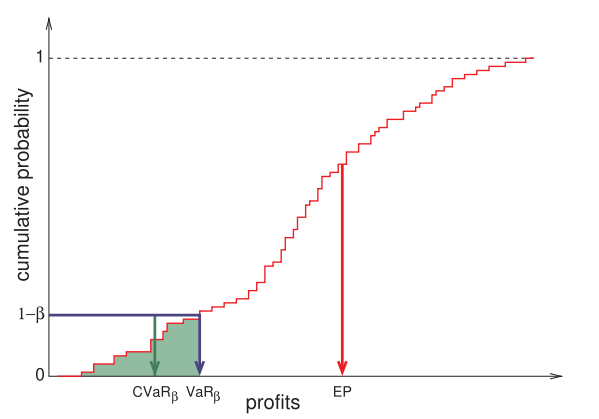

**In this figure EP represents the expected value of the profit distribution (average profit) where profit is representative of the portfolio return*

#### Literature Examples Using CVaR

<div class="csl-entry">Mutran, V. M., Ribeiro, C. O., Nascimento, C. A. O., &#38; Chachuat, B. (2020). Risk-conscious optimization model to support bioenergy investments in the Brazilian sugarcane industry. <i>Applied Energy</i>, <i>258</i>. https://doi.org/10.1016/j.apenergy.2019.113978</div>

<div class="csl-entry">Xuan, A., Shen, X., Guo, Q., &#38; Sun, H. (2021). A conditional value-at-risk based planning model for integrated energy system with energy storage and renewables. <i>Applied Energy</i>, <i>294</i>. https://doi.org/10.1016/j.apenergy.2021.116971</div>

## Motivating Example: Product Portfolio Optimization in the Brazilian Sugarcane Industry

Brazil is the world leader in sugar production and exportation. In 2015, sugarcane GDP reached US$ 28.5 billion, with a production scale that achieved more than 30 million tons of sugar and 21 million cubic meters of ethanol [5]. The price of ethanol in Brazil is limited by the domestic price of oil and international fuel market conditions, and sugar prices are defined at the international commodity market. Weather conditions, international sugar prices, and instability of governmental fuel policies and subsidies create huge uncertainties in these markets [6]. Therefore, it is essential to quantify the financial risk from these volatile markets. Here we use portfolio optimization and three different risk measures to mitigate the impacts of financial risk in this industry by changing the sugarcane mill product portfolio.

### Problem Definition

For this problem, we model a sugarcane mill that can produce sugar, ethanol, and electricity with the ability to sell electricity to free and regulated markets. The overall capacity of the sugarcane mill is 3,000,000 tonnes of sugarcane, and conversion and cost data are provided.

### Process Flow Diagram

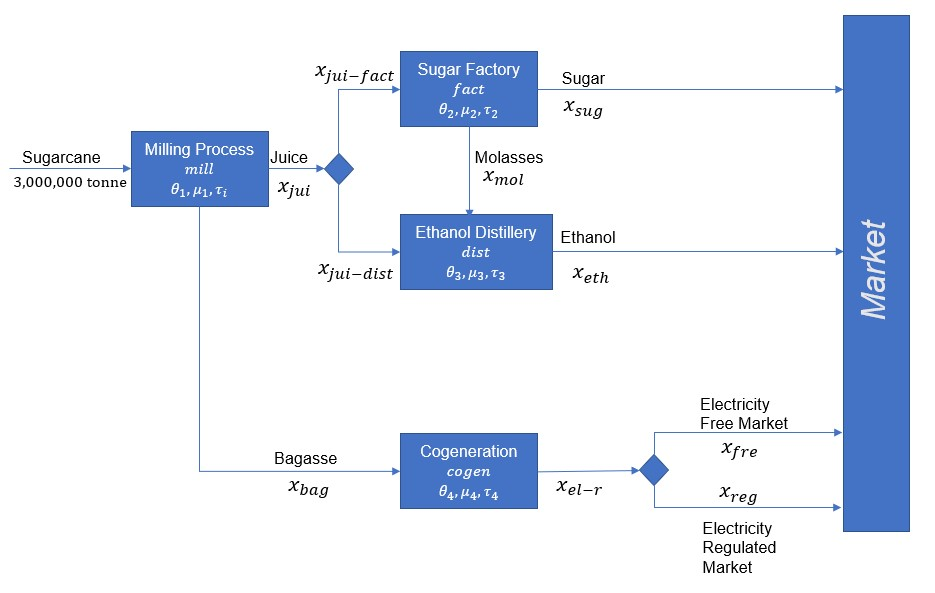

### Process Model

***Sets***
\begin{align*}
p \in P: Products \\
s \in S: Saleable\ Products \\
c \in C: Commodities \\
u \in U: Process\ Units \\
q \in Q: Historical\ Price\ Scenarios
\end{align*}

***Parameters***
\begin{align*}
Ca: Yearly\ production\ of\ sugarcane \\
\tau_{u}: Maximum\ capacity\ of\ process\ unit\ u \\
PC_{s}: Production\ cost\ of\ saleable\ product\ s \\
\theta_{f,u,p}: Conversion\ of\ resource\ f\ in\ process\ unit\ u\ to\ product\ p \\
\gamma_{u,p}: Generation\ of\ product\ p\ in\ unit\ u \\
HP_{q,c}: Historical\ Prices\ at\ price\ scenario\ q\\
\pi_{reg}: Price \ of \ electricity \ at \ the \ regulated \ market
\end{align*}

***Variables***
\begin{align*}
x_{p}: Amount\ of\ product\ p \\
profit_{q}: Profit\ for\ each\ historical\ price\ scenario\ q\\
Eprofit: Expected\ value\ of\ the\ profit
\end{align*}

***Constraints***

*Mass Balances*
\begin{align*}
x_{jui} = Ca \cdot \theta_{cane,mill,jui} \\
x_{bag} = Ca \cdot \theta_{cane,mill,bag} \\
x_{jui} = x_{jui-fact} + x_{jui-dist} \\
x_{sug} = x_{jui-fact} \cdot \theta_{jui,fact,sug} \\
x_{mol} = x_{sug} \cdot \gamma_{mol,fact} \\
x_{eth} = x_{jui-dist} \cdot \theta_{jui,dist,eth} + x_{mol} \cdot \theta_{mol,dist,eth} \\
x_{reg} + x_{free} = x_{el-r}
\end{align*}

*Profit Calculations*
\begin{align*}
profit_{q} = \sum_{c \in C} x_{p} \cdot HP_{q,c} + x_{reg} \cdot \pi_{reg} - \sum_{s \in S} x_{s} \cdot PC_{s} \ \ \forall \ \ q \in Q\\
Eprofit = \frac{1}{Q} \sum_{q \in Q} profit_{q} \\ 
\end{align*}

### Degree of Freedom (DOF) Analysis

**Number of Variables**
\begin{align*}
x_{p} \cdot 10 \ products \\
profit_{Q} \cdot Q \\
Eproft \cdot 1 \\
Total\ Variables = 10 + Q + 1
\end{align*}

**Number of Constraints**
\begin{align*}
7 \ mass \ balances \\
profit \ scenarios \cdot Q \\
Eproft \cdot 1 \\
Total\ Constraints = 7 + Q + 1
\end{align*}

**DOF**
\begin{align*}
DOF = Variables - Constraints \\
DOF = 10 + Q + 1 - 7 - Q - 1 \\
DOF = 3
\end{align*}

### Visualize Input Data

In [1]:
#Import Needed Libraries
import sys
if "google.colab" in sys.modules:
    !wget "https://raw.githubusercontent.com/ndcbe/optimization/main/notebooks/helper.py"
    import helper
    helper.install_idaes()
    helper.install_ipopt()

import pandas as pd
import numpy as np
import pyomo.environ as pyo
import matplotlib.pyplot as plt

--2023-05-05 03:28:32--  https://raw.githubusercontent.com/ndcbe/optimization/main/notebooks/helper.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 6463 (6.3K) [text/plain]
Saving to: ‘helper.py.3’

helper.py.3         100%[===================>]   6.31K  --.-KB/s    in 0s      

2023-05-05 03:28:32 (56.6 MB/s) - ‘helper.py.3’ saved [6463/6463]

IDAES found! No need to install.
Ipopt found! No need to install.
ipopt was successfully installed
k_aug was successfully installed


In [2]:
#Load Data From CSV files stored on Github
path_cap='https://raw.githubusercontent.com/MadelynnWatson/RiskMeasures/main/Capacity.csv'
path_opex = 'https://raw.githubusercontent.com/MadelynnWatson/RiskMeasures/main/OPEX.csv'
path_conv = 'https://raw.githubusercontent.com/MadelynnWatson/RiskMeasures/main/conversions.csv'
path_gen = 'https://raw.githubusercontent.com/MadelynnWatson/RiskMeasures/main/generation.csv'
path_hp = 'https://raw.githubusercontent.com/MadelynnWatson/RiskMeasures/main/historicalprices.csv'
df_maxcap = pd.read_csv(path_cap)
df_prodcost = pd.read_csv(path_opex)
df_conv = pd.read_csv(path_conv)
df_gen = pd.read_csv(path_gen)
df_hp = pd.read_csv(path_hp)

In [3]:
## Uncomment to Display Additional Data in Tables
# display(df_maxcap)
# display(df_prodcost)
# display(df_conv)
# display(df_gen)

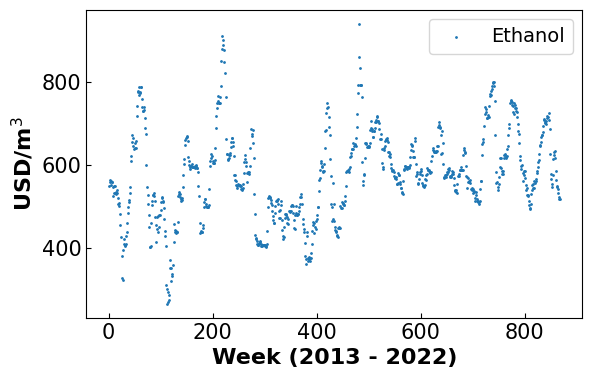

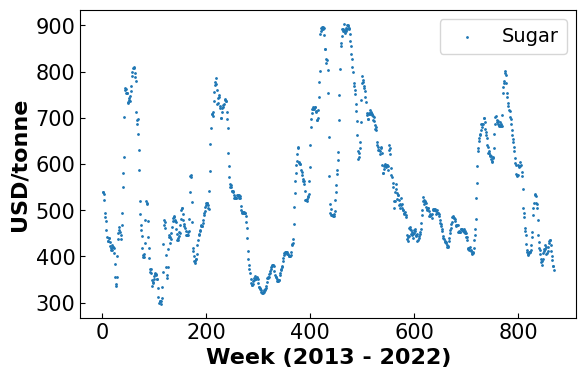

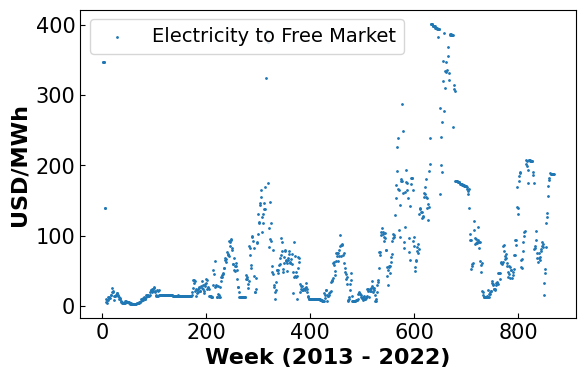

In [4]:
#Plot historical prices
x = np.arange(1,len(df_hp['eth'])+ 1)
fig, ax = plt.subplots(figsize=(6.4, 4))
plt.scatter(x,df_hp['eth'],1, label = 'Ethanol')
plt.xlabel('Week (2013 - 2022)', fontsize = 16, fontweight='bold')
plt.ylabel('USD/m$^3$', fontsize = 16, fontweight = 'bold')
plt.legend(fontsize = 14)
ax.xaxis.set_tick_params(labelsize=15)
ax.yaxis.set_tick_params(labelsize=15)
ax.tick_params(direction="in")
plt.show()

fig, ax = plt.subplots(figsize=(6.4, 4))
plt.scatter(x,df_hp['sug'],1, label = 'Sugar')
plt.xlabel('Week (2013 - 2022)', fontsize = 16, fontweight='bold')
plt.ylabel('USD/tonne', fontsize = 16, fontweight = 'bold')
plt.legend(fontsize = 14)
ax.xaxis.set_tick_params(labelsize=15)
ax.yaxis.set_tick_params(labelsize=15)
ax.tick_params(direction="in")
plt.show()

fig, ax = plt.subplots(figsize=(6.4, 4))
plt.scatter(x,df_hp['fre'],1, label = 'Electricity to Free Market')
plt.xlabel('Week (2013 - 2022)', fontsize = 16, fontweight='bold')
plt.ylabel('USD/MWh', fontsize = 16, fontweight = 'bold')
plt.legend(fontsize = 14)
ax.xaxis.set_tick_params(labelsize=15)
ax.yaxis.set_tick_params(labelsize=15)
ax.tick_params(direction="in")
plt.show()

### Define Base Model in Pyomo

In [5]:
#Create Base Model In Pyomo
def create_model():
    '''
    This function buils a superstructure model in Pyomo for a sugarcane mill that can produce jet fuel.

    Inputs: 
            product: desired product to maximize
            pathway: Excel sheet containing Jet fuel

    Returns: Pyomo model m
    '''
    m=pyo.ConcreteModel()
    
    #SETS
    resources = ['sug', 'eth', 'fre', 'reg', 'cane', 'jui', 'mol', 'bag', 'el-r']
    saleable_products = ['sug', 'eth', 'fre', 'reg']
    processes = ['mill', 'fact', 'dist','cogen']
    commodity = ['fre','sug','eth']

    #PARAMETERS
    #Scalars
    Ca = 3000000  #Annual Sugarcane Capacity
    beta = 0.9   #Confidence Level For CVaR Formulation
    price_reg = 72.5   #Price of electricity sold to the regulated market

    #Fill in Dictionaries with Excel Data
    max_cap = {}
    prodcost = {}
    conv = {}
    gen = {}
    hp = {}

    for i in range(len(df_maxcap['process'])):
        max_cap[df_maxcap['process'][i]] = df_maxcap['capacity'][i]

    for i in range(len(df_prodcost['saleable_product'])):
        prodcost[df_prodcost['saleable_product'][i]] = df_prodcost['cost'][i]

    for k in resources:
        for i in range(len(df_conv[k])):
            conv[(df_conv['resource'][i],df_conv['process'][i],k)] = df_conv[k][i]

    for k in resources:
        for i in range(len(df_gen[k])):
            gen[(df_gen['process'][i],k)] = df_gen[k][i]

    for k in commodity:
        for i in range(len(df_hp[k])):
            hp[(df_hp['q'][i],k)] = df_hp[k][i]

    N = len(df_hp['q'])
    q=[]
    for i in range(1,N+1):
        q.append('t%d' %(i))
        
    #PYOMO SETS
    m.resources = pyo.Set(initialize = resources)
    m.saleable_products = pyo.Set(initialize = saleable_products)
    m.processes = pyo.Set(initialize = processes)
    m.price_time_obs = pyo.Set(initialize = q)
    m.commodities = pyo.Set(initialize = commodity)
    
    m.N = pyo.Param(initialize = N)

    #VARIABLES
    #Positive Variables
    m.x = pyo.Var(m.resources, within = pyo.NonNegativeReals)
    m.r = pyo.Var(m.resources,m.processes, within = pyo.NonNegativeReals) #For juice split point
    m.profit = pyo.Var(m.price_time_obs)
    m.EP = pyo.Var()

    #CONSTRAINTS
    #Superstructure Constraints
    def mill1(m):
        return m.x['jui'] == Ca * conv['cane','mill','jui']
    m.milleq1 = pyo.Constraint(rule = mill1)

    def mill2(m):
        return m.x['bag'] == Ca * conv['cane','mill','bag']
    m.milleq2 = pyo.Constraint(rule = mill2)

    def juice1(m):
        return m.x['jui'] == m.r['jui','fact'] + m.r['jui','dist']
    m.juiceeq1 = pyo.Constraint(rule = juice1)

    def juice2(m):
        return m.r['jui','fact'] <= max_cap['fact']
    m.juiceeq2 = pyo.Constraint(rule = juice2)

    def juice3(m):
        return m.r['jui','dist'] <= max_cap['dist']
    m.juiceeq3 = pyo.Constraint(rule = juice3)

    def sugar1(m):
        return m.x['sug'] == conv['jui', 'fact', 'sug'] * m.r['jui','fact']
    m.su1 = pyo.Constraint(rule = sugar1)

    def sugar2(m):
        return m.x['mol'] == gen['fact','mol'] * m.x['sug']
    m.su2 = pyo.Constraint(rule = sugar2)

    def ethanol1(m):
        return m.x['eth'] == conv['jui','dist','eth'] * m.r['jui','dist'] + conv['mol','dist','eth']*m.x['mol']
    m.et1 = pyo.Constraint(rule = ethanol1)

    def el_prod(m):
        return m.x['el-r'] == Ca * 0.053 #53 kWh produced per ton of sugarcane processes
    m.el_produced = pyo.Constraint(rule = el_prod)

    def el_sales(m):
        return m.x['fre'] + m.x['reg'] == m.x['el-r']
    m.electricity = pyo.Constraint(rule = el_sales)
    
    #Expected Profit
    def profit(m,q):
        return m.profit[q] == m.x['sug']*hp[q,'sug'] + m.x['eth']*hp[q,'eth'] + m.x['fre']*hp[q,'fre'] + m.x['reg']*price_reg - sum(m.x[j]*prodcost[j] for j in m.saleable_products)
    m.profiteq = pyo.Constraint(m.price_time_obs, rule = profit)
        
    def eprofit1(m):
        return m.EP == (1/N)*sum(m.profit[q] for q in m.price_time_obs)
    m.ep1 = pyo.Constraint(rule = eprofit1)
    
    #Product Revenues to be used in analysis
    def sug_prof(m):
        return sum(m.x['sug']*hp[q,'sug'] for q in m.price_time_obs) * (1/N)
    m.avg_sug_prof = pyo.Expression(rule = sug_prof)

    def eth_prof(m):
        return sum(m.x['eth']*hp[q,'eth'] for q in m.price_time_obs) * (1/N)
    m.avg_eth_prof = pyo.Expression(rule = eth_prof)

    def el_prof(m):
        return sum(m.x['fre']*hp[q,'fre'] for q in m.price_time_obs) * (1/N)
    m.avg_el_prof = pyo.Expression(rule = el_prof)

    return m

### Maximize Profit Only (No Risk Measure)

In [6]:
#Load the base model from the function created above
m = create_model()

#Set the objective to maximize the expected value of the profit
def obj_rule(m):
    return m.EP
m.obj = pyo.Objective(rule=obj_rule, sense=pyo.maximize)

#Solve the Model
sol =pyo.SolverFactory('ipopt')

sol.solve(m)

print('Results')
print('----------------------------------------------------')
print('Expected Profit', np.round(pyo.value(m.obj),2), 'USD')
print('Ethanol Produced',  np.round(pyo.value(m.x['eth']),2), 'm3')
print('Sugar Produced', np.round(pyo.value(m.x['sug']),2), 'tonne')
print('Electricity Produced', np.round(pyo.value(m.x['el-r']),2), 'MWh')
print('Electricity to Free Market', np.round(pyo.value(m.x['fre']),2), 'MWh')
print('Electricity to Regulated Market', np.round(pyo.value(m.x['reg']),2), 'MWh')


Results
----------------------------------------------------
Expected Profit 64780608.72 USD
Ethanol Produced 155062.24 m3
Sugar Produced 189129.78 tonne
Electricity Produced 159000.0 MWh
Electricity to Free Market 159000.0 MWh
Electricity to Regulated Market 0.0 MWh


### Visualize Results

#### Profit Distribution

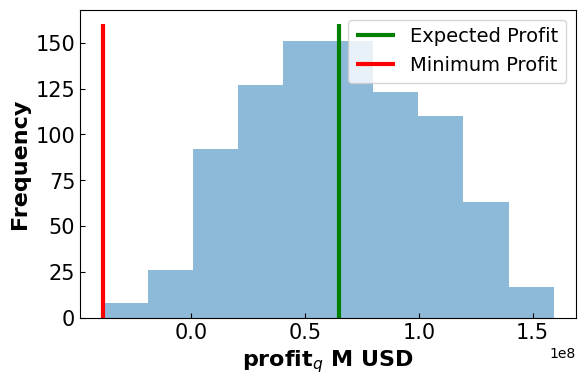

Results
-------------------------------------
Expected Profit: 64.78 M USD
Minimum Profit: -39.0 M USD
Difference: 103.78 M USD


In [7]:
#Collect the profit distribution
profits = []
for i in m.price_time_obs:
    profits.append(pyo.value(m.profit[i]))

#Collect the minimum profit
min_prof = min(profits)

#Plot the Profit Distribution
fig, ax = plt.subplots(figsize=(6.4, 4))
plt.hist(np.array(profits), alpha = 0.5)
plt.vlines(ymin = 0,ymax= 160, x= pyo.value(m.obj), label = 'Expected Profit', color = 'green', linewidth =3)
plt.vlines(ymin = 0, ymax = 160, x=min_prof, label = ('Minimum Profit'), color = 'red', linewidth = 3)
plt.xlabel('profit$_q$ M USD', fontsize = 16, fontweight='bold')
plt.ylabel('Frequency', fontsize = 16, fontweight='bold')
plt.legend(fontsize = 14)
ax.xaxis.set_tick_params(labelsize=15)
ax.yaxis.set_tick_params(labelsize=15)
ax.tick_params(direction="in")
plt.show()

print('Results')
print('-------------------------------------')
print('Expected Profit:', np.round(pyo.value(m.obj)/1e6,2), 'M USD')
print('Minimum Profit:', np.round(min_prof/1e6,2), 'M USD')
difference = pyo.value(m.obj) - min_prof
print('Difference:', np.round(difference/1e6,2), 'M USD')

#Collect Results for Conclusion
final_EP = {}
final_min = {}
final_diff = {}

final_EP['No Risk'] = pyo.value(m.obj)/1e6
final_min['No Risk'] = min_prof/1e6
final_diff['No Risk'] = difference/1e6

#### Product Distribution

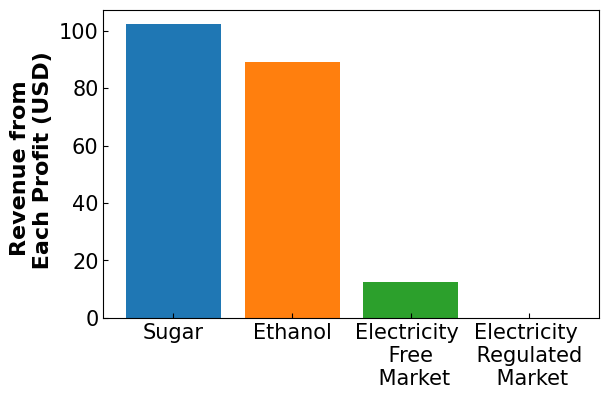

In [8]:
fig, ax = plt.subplots(figsize=(6.4, 4))
plt.bar('Sugar',pyo.value(m.avg_sug_prof)/1e6)
plt.bar('Ethanol', pyo.value(m.avg_eth_prof)/1e6)
plt.bar('Electricity \n Free \n Market', pyo.value(m.avg_el_prof)/1e6)
plt.bar('Electricity \n Regulated \n Market', pyo.value(m.x['reg'])*72.5/1e6)
plt.ylabel('Product', fontsize = 16, fontweight='bold')
plt.ylabel('Revenue from \n Each Profit (USD)', fontsize = 16, fontweight='bold')
ax.xaxis.set_tick_params(labelsize=15)
ax.yaxis.set_tick_params(labelsize=15)
ax.tick_params(direction="in")
plt.show()

## Solve Model with Risk Measures

### Formulate the MV Objective

***Additional Parameters***
\begin{align*}
\sigma_{i,j}: \ Covariance \ matrix \ between \ returns \ i \ and \ j \in \ commodities
\end{align*}

***Calculating Returns from Historical Price Data***
\begin{align*}
r^{lin} & = \frac{HP_{q+\Delta q} - HP_q}{HP_q}  \ for \ c \in C
\end{align*}

***Objective***
\begin{align*}
minimize \ MV = \sum_{i=1}^{n} \sum_{j=1}^{n} \sigma_{i,j} x_i x_j 
\end{align*}

#### Calculate the Covariance Matrix

In [9]:
#Calculate the Covariance Matrix

#Drop the scenario number column
price = df_hp.drop(columns = ['q'])

#Calculate Returns
Returns = price.diff()/price.shift(1)

covar = Returns.cov()
print('Covariance Matrix')
print('-------------------')
print(covar)

Covariance Matrix
-------------------
          fre       sug       eth
fre  0.094993 -0.000350 -0.000756
sug -0.000350  0.000922  0.000390
eth -0.000756  0.000390  0.001578


In [10]:
#Reload the base Model
m = create_model()

#Define MV as the objective
def mean_value(m):
    return sum(m.x[i]*covar.loc[i,j]*m.x[j] for i in m.commodities for j in m.commodities)
m.obj = pyo.Objective(rule = mean_value, sense = pyo.minimize)

#Solve the Model
sol =pyo.SolverFactory('ipopt')

sol.solve(m)

print('Results')
print('--------------------------------------')
print('Expected Profit', np.round(pyo.value(m.EP),2), 'USD')
print('Ethanol Produced', np.round(pyo.value(m.x['eth']),2), 'm3')
print('Sugar Produced', np.round(pyo.value(m.x['sug']),2), 'tonne')
print('Electricity Produced', np.round(pyo.value(m.x['el-r']),2), 'MWh')
print('Electricity to Free Market', np.round(pyo.value(m.x['fre']),2), 'MWh')
print('Electricity to Regulated Market', np.round(pyo.value(m.x['reg']),2), 'MWh')


Results
--------------------------------------
Expected Profit 56801237.35 USD
Ethanol Produced 179548.97 m3
Sugar Produced 148824.72 tonne
Electricity Produced 159000.0 MWh
Electricity to Free Market 1976.55 MWh
Electricity to Regulated Market 157023.45 MWh


### Visualize Results

#### Profit Distribution

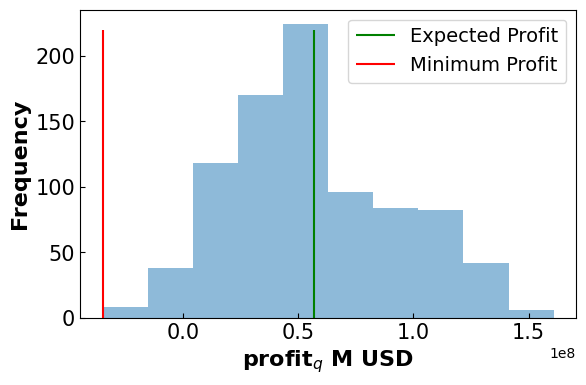

Results
-------------------------------------
Expected Profit: 56.8 M USD
Minimum Profit: -34.87 M USD
Difference: 91.68 M USD


In [11]:
#Collect the profit distribution
profits = []
for i in m.price_time_obs:
    profits.append(pyo.value(m.profit[i]))

#Collect the minimum profit
min_prof = min(profits)

#Plot the Profit Distribution
fig, ax = plt.subplots(figsize=(6.4, 4))
plt.hist(np.array(profits), alpha = 0.5)
plt.vlines(ymin = 0,ymax= 220, x= pyo.value(m.EP), label = 'Expected Profit', color = 'green')
plt.vlines(ymin = 0, ymax = 220, x=min_prof, label = ('Minimum Profit'), color = 'red')
plt.xlabel('profit$_q$ M USD', fontsize = 16, fontweight='bold')
plt.ylabel('Frequency', fontsize = 16, fontweight='bold')
plt.legend(fontsize = 14)
ax.xaxis.set_tick_params(labelsize=15)
ax.yaxis.set_tick_params(labelsize=15)
ax.tick_params(direction="in")
plt.show()

print('Results')
print('-------------------------------------')
print('Expected Profit:', np.round(pyo.value(m.EP)/1e6,2), 'M USD')
print('Minimum Profit:', np.round(min_prof/1e6,2), 'M USD')
difference = pyo.value(m.EP) - min_prof
print('Difference:', np.round(difference/1e6,2), 'M USD')

#Collect results for conclusion
final_EP['MV'] = pyo.value(m.EP)/1e6
final_min['MV'] = min_prof/1e6
final_diff['MV'] = difference/1e6

#### Product Distribution

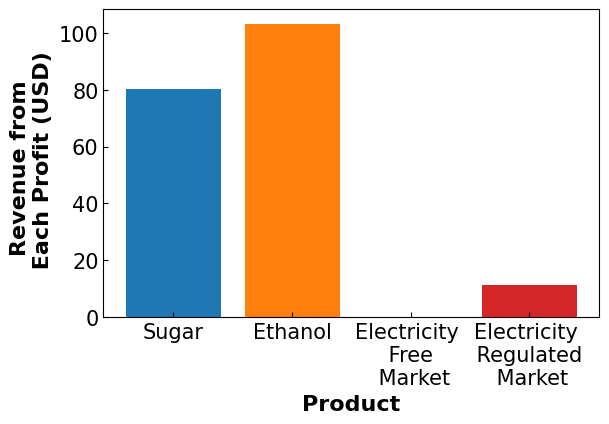

In [12]:
fig, ax = plt.subplots(figsize=(6.4, 4))
plt.bar('Sugar',pyo.value(m.avg_sug_prof)/1e6)
plt.bar('Ethanol', pyo.value(m.avg_eth_prof)/1e6)
plt.bar('Electricity \n Free \n Market', pyo.value(m.avg_el_prof)/1e6)
plt.bar('Electricity \n Regulated \n Market', pyo.value(m.x['reg'])*72.5/1e6)
plt.xlabel('Product', fontsize = 16, fontweight = 'bold')
plt.ylabel('Revenue from \n Each Profit (USD)', fontsize = 16, fontweight='bold')
ax.xaxis.set_tick_params(labelsize=15)
ax.yaxis.set_tick_params(labelsize=15)
ax.tick_params(direction="in")
plt.show()

### Formulate the MAD Objective

\begin{align*}
minimize \ \ MAD = E \left[ \mid \sum_{j=1}^{n} R_j x_j -E \left[ \sum_{j=1}^{n} R_j x_j \right] \mid \right]
\end{align*}


In [13]:
#Reload the base Model
m = create_model()

#Create set of return indicies
J = np.arange(1,m.N)

#Create new variables
m.y_aux = pyo.Var(J, within = pyo.NonNegativeReals)
m.z_aux = pyo.Var(J, within = pyo.NonNegativeReals)

#Constrain y - z to be the abs portion
def aux_con(m,j):
    return m.y_aux[j] - m.z_aux[j] == sum(m.x[i]*(Returns.loc[j,i]-((1/m.N)*sum(Returns.loc[j,i] for j in J))) for i in m.commodities)
m.aux = pyo.Constraint(J, rule = aux_con)

#Define MAD as the objective
def mad(m):
    return 1/m.N * sum(m.y_aux[j] + m.z_aux[j] for j in J)
m.obj = pyo.Objective(rule = mad, sense = pyo.minimize)

#Solve the Model
sol =pyo.SolverFactory('ipopt')

results = sol.solve(m)

print('Results')
print('------------------------------')
print('Expected Profit', np.round(pyo.value(m.EP),2), 'USD')
print('Ethanol Produced', np.round(pyo.value(m.x['eth']),2), 'm3')
print('Sugar Produced', np.round(pyo.value(m.x['sug']),2), 'tonne')
print('Electricity Produced', np.round(pyo.value(m.x['el-r']),2), 'MWh')
print('Electricity to Free Market', np.round(pyo.value(m.x['fre']),2), 'MWh')
print('Electricity to Regulated Market', np.round(pyo.value(m.x['reg']),2), 'MWh')

Results
------------------------------
Expected Profit 50666115.0 USD
Ethanol Produced 200905.27 m3
Sugar Produced 113672.34 tonne
Electricity Produced 159000.0 MWh
Electricity to Free Market 891.43 MWh
Electricity to Regulated Market 158108.57 MWh


### Visualize Results

#### Profit Distribution

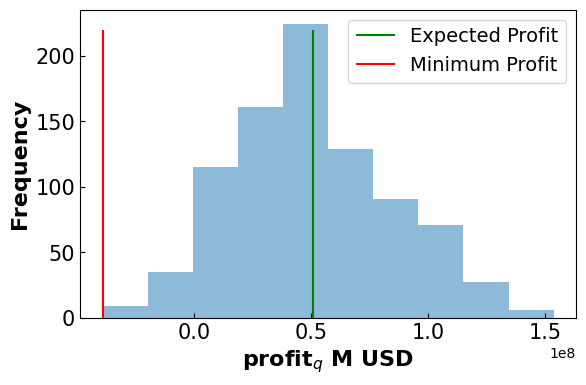

Results
-------------------------------------
Expected Profit: 50.67 M USD
Minimum Profit: -39.02 M USD
Difference: 89.68 M USD


In [14]:
#Collect the profit distribution
profits = []
for i in m.price_time_obs:
    profits.append(pyo.value(m.profit[i]))

#Collect the minimum profit
min_prof = min(profits)

#Plot the Profit Distribution
fig, ax = plt.subplots(figsize=(6.4, 4))
plt.hist(np.array(profits), alpha = 0.5)
plt.vlines(ymin = 0,ymax= 220, x= pyo.value(m.EP), label = 'Expected Profit', color = 'green')
plt.vlines(ymin = 0, ymax = 220, x=min_prof, label = ('Minimum Profit'), color = 'red')
plt.xlabel('profit$_q$ M USD', fontsize = 16, fontweight='bold')
plt.ylabel('Frequency', fontsize = 16, fontweight='bold')
plt.legend(fontsize = 14)
ax.xaxis.set_tick_params(labelsize=15)
ax.yaxis.set_tick_params(labelsize=15)
ax.tick_params(direction="in")
plt.show()

print('Results')
print('-------------------------------------')
print('Expected Profit:', np.round(pyo.value(m.EP)/1e6,2), 'M USD')
print('Minimum Profit:', np.round(min_prof/1e6,2), 'M USD')
difference = pyo.value(m.EP) - min_prof
print('Difference:', np.round(difference/1e6,2), 'M USD')

#Collect results for conclusion
final_EP['MAD'] = pyo.value(m.EP)/1e6
final_min['MAD'] = min_prof/1e6
final_diff['MAD'] = difference/1e6

#### Product Distribution

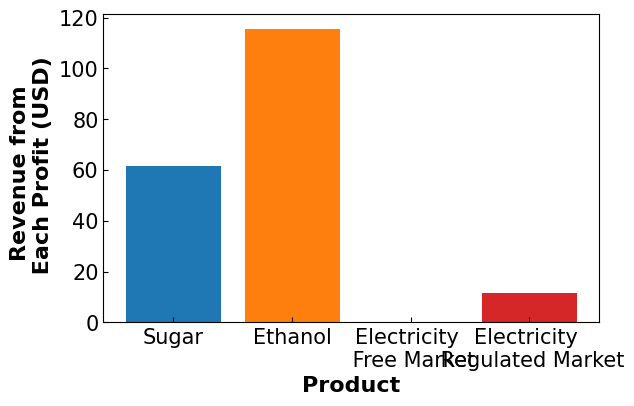

In [15]:
fig, ax = plt.subplots(figsize=(6.4, 4))
plt.bar('Sugar',pyo.value(m.avg_sug_prof)/1e6)
plt.bar('Ethanol', pyo.value(m.avg_eth_prof)/1e6)
plt.bar('Electricity \n Free Market', pyo.value(m.avg_el_prof)/1e6)
plt.bar('Electricity \n Regulated Market', pyo.value(m.x['reg'])*72.5/1e6)
plt.xlabel('Product', fontsize=16, fontweight='bold')
plt.ylabel('Revenue from \n Each Profit (USD)', fontsize = 16, fontweight='bold')
ax.xaxis.set_tick_params(labelsize=15)
ax.yaxis.set_tick_params(labelsize=15)
ax.tick_params(direction="in")
plt.show()

### Formulate the CVaR Objective

***Additional Parameters***
\begin{align*}
\alpha: VaR \\
\beta: Confidence\ Level 
\end{align*}

***Additional Variables***
\begin{align*}
shortfall_{q}: Difference \ between \ VaR \ and \ profit_{q} \ at \ price \ scenario \ q\\
\end{align*}

***Additional Constraints***
\begin{align*}
shortfall_{q} \ \geq \ 0 \ \ \forall \ \ q \in Q \\
profit_{q} + shortfall_{q} - \alpha \geq 0 \ \ \forall \ \ q \in Q \\
CVaR = \alpha - \left[ \frac{1}{Q(1-\beta)} \sum_{q \in Q} shortfall_{q} \right] \\
\end{align*}

***CVaR Objective***
\begin{align*}
\max{CVaR}
\end{align*}

In [16]:
#Reload the base Model
m = create_model()

#Add parameters
beta = 0.9 #confidence interval

#Add variables
m.shortfall = pyo.Var(m.price_time_obs)
m.alpha = pyo.Var()
m.CVaR = pyo.Var()

#Add CVaR Constraints
def CVaR1(m):
    return m.CVaR == m.alpha - ((1/(m.N*(1-beta)))*sum(m.shortfall[q] for q in m.price_time_obs))
m.cvar1eq = pyo.Constraint(rule = CVaR1)

def CVaR2(m,q):
    return m.shortfall[q] >= 0 
m.cvar2eq = pyo.Constraint(m.price_time_obs, rule = CVaR2)

def CVaR4(m,q):
    return m.profit[q] + m.shortfall[q] - m.alpha >= 0
m.cvar4eq = pyo.Constraint(m.price_time_obs, rule = CVaR4)

#OBJECTIVE
def obj_rule(m):
    return m.CVaR
m.obj = pyo.Objective(rule=obj_rule, sense=pyo.maximize)

#Solve the Model
sol =pyo.SolverFactory('ipopt', tee = True)

results = sol.solve(m)

print('Results')
print('------------------------------')
print('Expected Profit', np.round(pyo.value(m.EP),2), 'USD')
print('Ethanol Produced', np.round(pyo.value(m.x['eth']),2), 'm3')
print('Sugar Produced', np.round(pyo.value(m.x['sug']),2), 'tonne')
print('Electricity Produced', np.round(pyo.value(m.x['el-r']),2), 'MWh')
print('Electricity to Free Market', np.round(pyo.value(m.x['fre']),2), 'MWh')
print('Electricity to Regulated Market', np.round(pyo.value(m.x['reg']),2), 'MWh')

Results
------------------------------
Expected Profit 63816118.02 USD
Ethanol Produced 155062.24 m3
Sugar Produced 189129.78 tonne
Electricity Produced 159000.0 MWh
Electricity to Free Market 0.0 MWh
Electricity to Regulated Market 159000.0 MWh


### Visualize Results

#### Profit Distribution

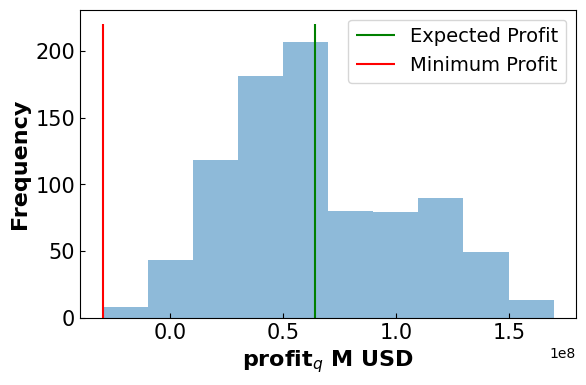

Results
-------------------------------------
Expected Profit: 63.82 M USD
Minimum Profit: -29.94 M USD
Difference: 93.76 M USD


In [17]:
#Collect the profit distribution
profits = []
for i in m.price_time_obs:
    profits.append(pyo.value(m.profit[i]))

#Collect the minimum profit
min_prof = min(profits)

#Plot the Profit Distribution
fig, ax = plt.subplots(figsize=(6.4, 4))
plt.hist(np.array(profits), alpha = 0.5)
plt.vlines(ymin = 0,ymax= 220, x= pyo.value(m.EP), label = 'Expected Profit', color = 'green')
plt.vlines(ymin = 0, ymax = 220, x=min_prof, label = ('Minimum Profit'), color = 'red')
plt.xlabel('profit$_q$ M USD', fontsize = 16, fontweight='bold')
plt.ylabel('Frequency', fontsize = 16, fontweight='bold')
plt.legend(fontsize = 14)
ax.xaxis.set_tick_params(labelsize=15)
ax.yaxis.set_tick_params(labelsize=15)
ax.tick_params(direction="in")
plt.show()

print('Results')
print('-------------------------------------')
print('Expected Profit:', np.round(pyo.value(m.EP)/1e6,2), 'M USD')
print('Minimum Profit:', np.round(min_prof/1e6,2), 'M USD')
difference = pyo.value(m.EP) - min_prof
print('Difference:', np.round(difference/1e6,2), 'M USD')

#Collect results for conclusion
final_EP['CVaR'] = pyo.value(m.EP)/1e6
final_min['CVaR'] = min_prof/1e6
final_diff['CVaR'] = difference/1e6

#### Product Distribution

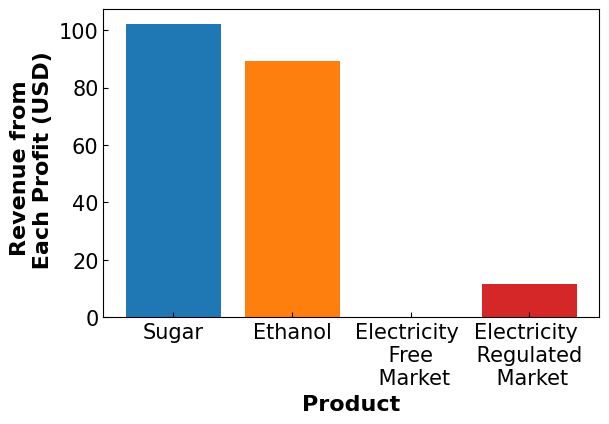

In [18]:
fig, ax = plt.subplots(figsize=(6.4, 4))
plt.bar('Sugar',pyo.value(m.avg_sug_prof)/1e6)
plt.bar('Ethanol', pyo.value(m.avg_eth_prof)/1e6)
plt.bar('Electricity \n Free \n Market', pyo.value(m.avg_el_prof)/1e6)
plt.bar('Electricity \n Regulated \n Market', pyo.value(m.x['reg'])*72.5/1e6)
plt.ylabel('Revenue from \n Each Profit (USD)', fontsize = 16, fontweight='bold')
plt.xlabel('Product', fontsize = 16, fontweight = 'bold')
ax.xaxis.set_tick_params(labelsize=15)
ax.yaxis.set_tick_params(labelsize=15)
ax.tick_params(direction="in")
plt.show()

## Conclusion

### Final Results Comparison

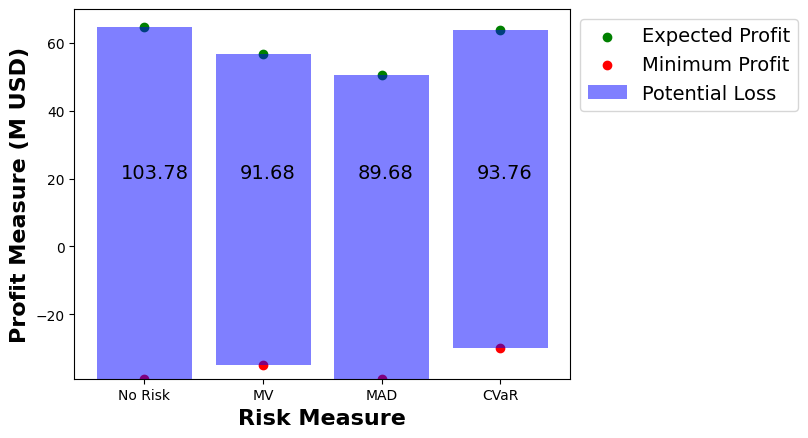

In [25]:
k=0
for i in final_EP.keys():
    if k < 0.5: 
        plt.scatter(i,final_EP[i], color = 'green',label = 'Expected Profit')
        plt.scatter(i,final_min[i], color = 'red', label = 'Minimum Profit')
        plt.bar(i,final_diff[i], color = 'blue', alpha = 0.5, bottom = final_min[i], label = 'Potential Loss')
        plt.text(k-0.2,20, np.round(final_diff[i],2), fontsize = 14)
    else:
        plt.scatter(i,final_EP[i], color = 'green')
        plt.scatter(i,final_min[i], color = 'red')
        plt.bar(i,final_diff[i], color = 'blue', alpha = 0.5, bottom = final_min[i])
        plt.text(k-0.2,20, np.round(final_diff[i],2), fontsize = 14)
    k = k+1

ax.xaxis.set_tick_params(labelsize=15)
ax.yaxis.set_tick_params(labelsize=15)
ax.tick_params(direction="in")
plt.legend(bbox_to_anchor=(1, 1),fontsize = 14)
plt.xlabel('Risk Measure' ,fontsize  = 16, fontweight = 'bold')
plt.ylabel('Profit Measure (M USD)', fontsize  = 16, fontweight = 'bold')
plt.show()

### Discussion Questions

## References

<div class="csl-entry"> [1] Gunjan, A., &#38; Bhattacharyya, S. (2022). A brief review of portfolio optimization techniques. <i>Artificial Intelligence Review</i>. https://doi.org/10.1007/s10462-022-10273-7</div>

<div class="csl-entry"> [2] Markowitz, H. (1959). Portfolio selection, efficient diversification of investments. Wiley, New York

<div class="csl-entry"> [3] Konno, H., &#38; Koshizuka, T. (2005). Mean-absolute deviation model. <i>IIE Transactions (Institute of Industrial Engineers)</i>, <i>37</i>(10), 893–900. https://doi.org/10.1080/07408170591007786</div>

<div class="csl-entry"> [4] Mutran, V. M., Ribeiro, C. O., Nascimento, C. A. O., &#38; Chachuat, B. (2020). Risk-conscious optimization model to support bioenergy investments in the Brazilian sugarcane industry. <i>Applied Energy</i>, <i>258</i>. https://doi.org/10.1016/j.apenergy.2019.113978</div>

<div class="csl-entry"> [5] Li, L., Lin, J., Wu, N., Xie, S., Meng, C., Zheng, Y., Wang, X., &#38; Zhao, Y. (2022). Review and outlook on the international renewable energy development. In <i>Energy and Built Environment</i> (Vol. 3, Issue 2, pp. 139–157). KeAi Communications Co. https://doi.org/10.1016/j.enbenv.2020.12.002</div>

<div class="csl-entry"> [6] Oliveira, S. M. de, Ribeiro, C. de O., &#38; Cicogna, M. P. V. (2018). Uncertainty effects on production mix and on hedging decisions: The case of Brazilian ethanol and sugar. <i>Energy Economics</i>, <i>70</i>, 516–524. https://doi.org/10.1016/j.eneco.2018.01.025</div>